# Case Study On Thera Bank Campaign

# Data Description

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# Domain

Banking

# Context

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

# Attribute Information

* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer
* ZIP Code: Home Address ZIP code.
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any.
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
BankCampaign = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
BankCampaign.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
BankCampaign = BankCampaign.drop('ID', axis =1 )
BankCampaign.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Check if any Null Values
BankCampaign.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
# To find data size
BankCampaign.shape

(5000, 13)

In [7]:
# To find the data types of given variables
BankCampaign.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
# Find the statistical Summary and found negative values in Experience. Correct and find stats again.
BankCampaign.describe().transpose()
BankCampaign["Experience"] = BankCampaign["Experience"].apply(abs)
BankCampaign.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
* Number of unique in each column?
* Number of people with zero mortgage?
* Number of people with zero credit card spending per month?
* Value counts of all categorical columns.
* Univariate and Bivariate
* Get data model ready

In [9]:
#Number of unique in each column?
BankCampaign.nunique()

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [10]:
#Number of people with zero mortgage?
BankCampaign[BankCampaign.Mortgage == 0].count()

Age                   3462
Experience            3462
Income                3462
ZIP Code              3462
Family                3462
CCAvg                 3462
Education             3462
Mortgage              3462
Personal Loan         3462
Securities Account    3462
CD Account            3462
Online                3462
CreditCard            3462
dtype: int64

In [11]:
#Number of people with zero credit card spending per month?
df = BankCampaign[BankCampaign.CreditCard == 0]
df['spentPerMonth'] = BankCampaign["Income"]/12
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,spentPerMonth
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,4.083333
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,2.833333
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0.916667
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,8.333333
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,2.416667


In [12]:
#Value counts of all categorical columns.

#ordinal:[Family,Education]
#nominal: [ID,Zip Code,Securities Account,CD Account,Online,Credit Card]
#Interval or Ratio:[Age,Experience,Income,CCAvg,Mortgage]

BankCampaigncategorical = BankCampaign.copy()
BankCampaigncategorical.drop(['Age','Experience','Income','CCAvg','Mortgage'],axis=1,inplace=True)

for i in BankCampaigncategorical.columns:
    x = BankCampaigncategorical[i].value_counts()
    print("Column name is:",i,"and it value is:",x)
    print()

Column name is: ZIP Code and it value is: 94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

Column name is: Family and it value is: 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Column name is: Education and it value is: 1    2096
3    1501
2    1403
Name: Education, dtype: int64

Column name is: Personal Loan and it value is: 0    4520
1     480
Name: Personal Loan, dtype: int64

Column name is: Securities Account and it value is: 0    4478
1     522
Name: Securities Account, dtype: int64

Column name is: CD Account and it value is: 0    4698
1     302
Name: CD Account, dtype: int64

Column name is: Online and it value is: 1    2984
0    2016
Name: Online, dtype: int64

Column name is: CreditCard and it value is: 0    3530
1    1470
Name: CreditCard, dtype: int64



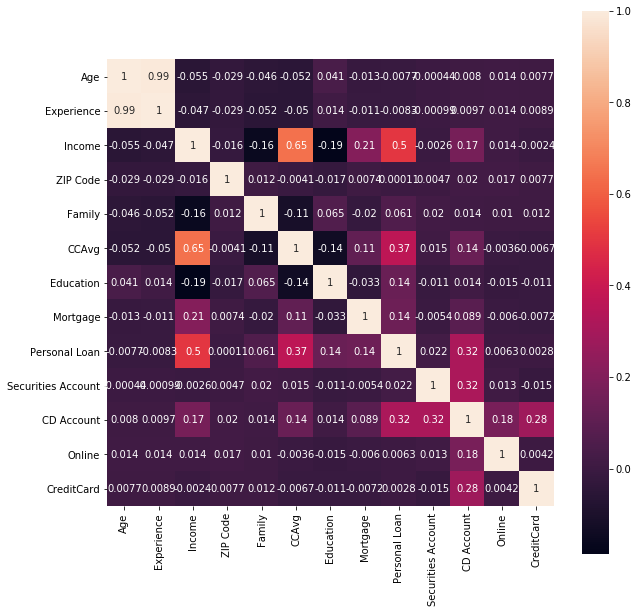

In [13]:
#Univariate and Bivariate

#Find the corelation between feature and target
corr = BankCampaign.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr,annot=True,square=True)

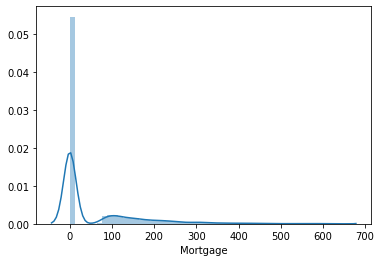

In [14]:
#Mortgage 
sns.distplot(BankCampaign["Mortgage"])

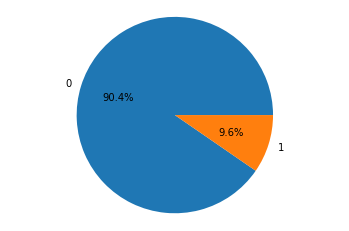

In [15]:
# Distribution of Target Varibale

df =pd.DataFrame(BankCampaign["Personal Loan"].value_counts()).reset_index()
df.columns =["Labels","Personal Loan"]
plt.pie(df["Personal Loan"],labels=df["Labels"],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

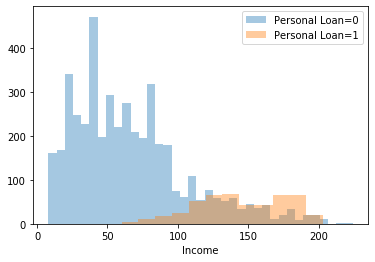

In [16]:
#Income with Personal Loan
sns.distplot(BankCampaign[BankCampaign["Personal Loan"] == 0]['Income'], label='Personal Loan=0',kde=False)
sns.distplot(BankCampaign[BankCampaign["Personal Loan"] == 1]['Income'], label='Personal Loan=1',kde=False)
plt.legend()

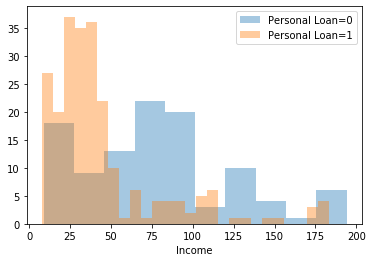

In [17]:
#CCAvg with Personal Loan
sns.distplot(BankCampaign[BankCampaign["CCAvg"] == 0]['Income'], label='Personal Loan=0',kde=False)
sns.distplot(BankCampaign[BankCampaign["CCAvg"] == 1]['Income'], label='Personal Loan=1',kde=False)
plt.legend()

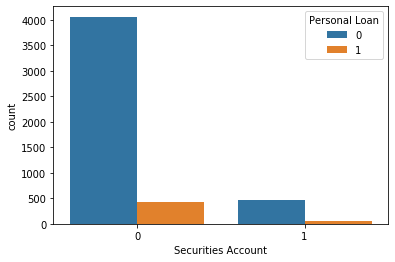

In [18]:
sns.countplot(x='Securities Account',data=BankCampaign,hue='Personal Loan')

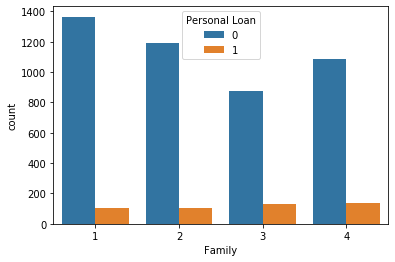

In [19]:
sns.countplot(x='Family',data=BankCampaign,hue='Personal Loan')

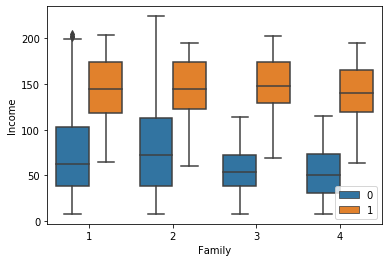

In [20]:
sns.boxplot(x='Family',data=BankCampaign,hue='Personal Loan',y='Income')
plt.legend()

In [21]:
#Get data model ready
# Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values

BankCampaign.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.367257,20.165487,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [29]:
#identify the feature and target

feature = BankCampaign.drop(["Personal Loan"],axis=1)
target = BankCampaign["Personal Loan"]

#After further analysis, feature can more cleaned-up

feature = feature.drop(["ZIP Code","Age","Online","CreditCard"],axis=1)
feature.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
0,1,49,4,1.6,1,0,1,0
1,19,34,3,1.5,1,0,1,0
2,15,11,1,1.0,1,0,0,0
3,9,100,1,2.7,2,0,0,0
4,8,45,4,1.0,2,0,0,0


In [30]:
feature["IncomePerSpend"] = (feature["Income"]/12)**feature["CCAvg"]
feature.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,IncomePerSpend
0,1,49,4,1.6,1,0,1,0,9.497816
1,19,34,3,1.5,1,0,1,0,4.769211
2,15,11,1,1.0,1,0,0,0,0.916667
3,9,100,1,2.7,2,0,0,0,306.344887
4,8,45,4,1.0,2,0,0,0,3.750000


In [31]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = BankCampaign['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


**Their is an imbalance in data**

In [32]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
scaler = StandardScaler();
colscal=["Experience","Mortgage","Income","CCAvg","IncomePerSpend"]

scaler.fit(feature[colscal])
scaled_features = pd.DataFrame(scaler.transform(feature[colscal]),columns=colscal)

feature =feature.drop(colscal,axis=1)
feature = scaled_features.join(feature)

In [33]:
feature.head()

,Experience,Mortgage,Income,CCAvg,IncomePerSpend,Family,Education,Securities Account,CD Account
0,-1.676408,-0.555524,-0.538229,-0.193385,-0.028303,4,1,1,0
1,-0.099404,-0.555524,-0.864109,-0.250611,-0.028303,3,1,1,0
2,-0.449849,-0.555524,-1.363793,-0.536736,-0.028303,1,1,0,0
3,-0.975517,-0.555524,0.569765,0.436091,-0.028303,1,2,0,0
4,-1.063129,-0.555524,-0.625130,-0.536736,-0.028303,4,2,0,0


In [34]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(feature,target,
                                                    test_size=0.30,
                                                    random_state=101)

In [35]:
y_train.value_counts()

0    3166
1     334
Name: Personal Loan, dtype: int64

### Model building using statsmodels.api

In [36]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.131636
         Iterations 9


In [37]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.5820
Time:                        00:14:36   Log-Likelihood:                -460.73
converged:                       True   LL-Null:                       -1102.2
Covariance Type:            nonrobust   LLR p-value:                1.458e-270
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -9.4822      0.479    -19.813      0.000     -10.420      -8.544
Experience             0.1281      0.088      1.464      0.143      -0.043       0.300
Mortgage            

#### Calculate the odds ratio from the coef using the formula odds ratio=exp(coef)

#### Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

In [38]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [39]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD Account,3.03,20.80,0.95,0.00
Income,2.41,11.10,0.92,0.00
Education,1.69,5.43,0.84,0.00
Family,0.68,1.98,0.66,0.00
CCAvg,0.21,1.23,0.55,0.01
Securities Account,-0.77,0.46,0.32,0.03
const,-9.48,0.00,0.00,0.00


* Customers with Certificate of Deposit Account has 95% probability of getting loan
* Customers with securities account has very less chance of getting the loan

# Model Building Using Logistic Regression

In [40]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_predict = logreg.predict(X_test)

In [42]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9474285714285714

Testing accuracy 0.9466666666666667

Confusion Matrix


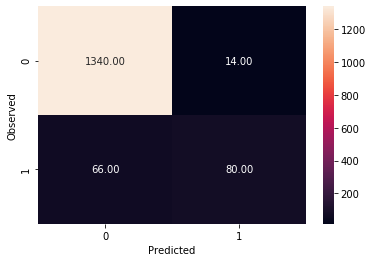

None

Recall: 0.547945205479452

Precision: 0.851063829787234

F1 Score: 0.6666666666666666

Roc Auc Score: 0.7688027356791647


In [43]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

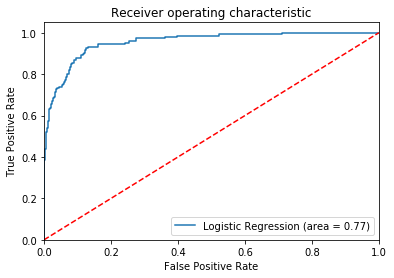

In [44]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Checking Parameters of Logistic Regression**

In [45]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [46]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.948, 0.948, 0.948, 0.948, 0.944]

[0.947, 0.947, 0.947, 0.948, 0.945]


In [47]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.948, 0.944]

[0.946, 0.945]


In [48]:
## Highest accuracy is same 'l1' with 'liblinear' and 'l2' with 'newton-cg'
# choose any one

In [49]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.8971428571428571

Testing accuracy 0.8953333333333333


In [50]:
## Testing accuracy increased and model is not overfit anymore so adding class weight from the model, 

In [51]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.845, 0.896, 0.898, 0.897, 0.897, 0.897]

[0.835, 0.893, 0.894, 0.895, 0.895, 0.895]


In [52]:
## Best testing accuracy is obtained for C=0.5, which is default

Trainig accuracy 0.8974285714285715

Testing accuracy 0.8953333333333333

Confusion Matrix


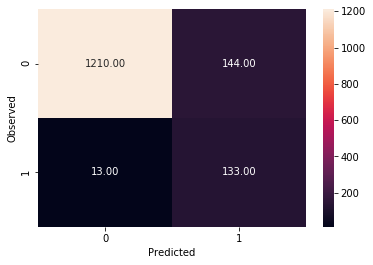

None

Recall: 0.910958904109589

Precision: 0.48014440433212996

F1 Score: 0.6288416075650117

Roc Auc Score: 0.9023036765747354


In [53]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [54]:
### Business Insights

*True Positive (observed=1,predicted=1):*

Predicted that Bank offered the loan and the customer accepted the offered loan

*False Positive (observed=0,predicted=1):*

Predicted that Bank offered the loan and the customer didnot accept the offered loan

*True Negative (observed=0,predicted=0):*

Predicted that Bank didnot offered the loan and the customer was not interested or not eligible for personal loan

*False Negative (observed=1,predicted=0):*

Predicted that Bank didnot offered the loan  and the customer was eligibile or interested for personal loan

Here the bank wants to give loan to the people who are eligible for the personal loan i.e. High Number of True Positive, if TP is high bank wouldnot lose money. 
So that most of the offered customer has accepted the loan. If FP is high bank would lose money so that bank doesn't lose money on the people who are not eligible for the loan.
Hence recall and Precision are the important metric.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict eligibility for Personal loan, model can be used for future customers. 